In [62]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [63]:
# Defining parameters 
# A + B > C
# Since inlet flow is equimolar CA = CB
# PBR is isothermal so (T/To) = 1

#Stoichiometry
a = 1
b = 1
c = 1
delta = c - a - b

# Inlet conditions
yAo = 0.5 #pure A in inlet
CAo = 3 # mol m^-3
vo = 10/3 # L/s
thetaB = 1 
eps = (yAo*delta)/a
Tc = 277 #K
Omega = 0.412


#Reaction rate data
k_o = 0.0079 #(m^3/mol.min)
k = k_o * Omega 


#Thermodynamic data
Hrxno = -100000 #J/mol
CpA = 2000 #J/mol.K
CpB = 3000 #J/mol.K
CpC = 2400 #J/mol.K 
deltaCp = (CpC-((b*CpB) + (a*CpA)))/a

To = 473 #K

Tref = 298 #K

#Heat exchange and coolant data
U = 40/3 #W/sqm.K
a = 300 #surface area per unit volume
mc = 5/3 #coolant mass flow rate (kg/s)
CpCool = 75000 #J/m^3.K

#Ergun parameters
alpha = 0.014 #1/kg

In [64]:
#Define the functions
# S = [XA, T, y, Tc]

def pbr(S, W):
    CA = (CAo * S[2] * To * (1-S[0]))/(S[1]*(1+eps*S[0]))
    CB = CA
    Hrxn = Hrxno
    dXAdW = (k*CA*CB)/(CAo*vo)
    dTdW = -(U*a*(S[1]-S[3])+ k*CA*CB*Hrxn)/(CAo*vo*((1-S[0])*(CpA +CpB)+S[0]*CpC))
    dydW = -(alpha*S[1]*(1 + eps*S[0]))/(2*S[2]*To) 
    dTcdW = (U*a*(S[1]-S[3]))/(mc*CpCool)
    dSdW =  [dXAdW, dTdW, dydW, dTcdW]
    return dSdW         

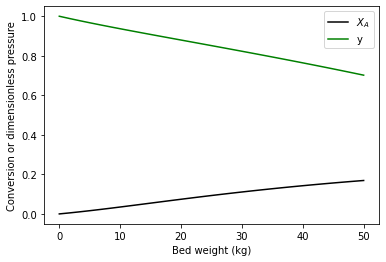

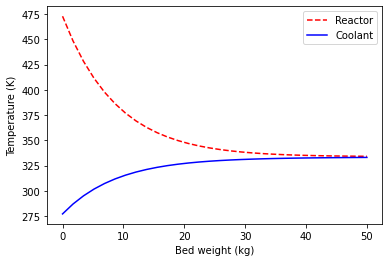

The exit temperature of the reacting stream is 334.13 K
The exit conversion is 0.17
The pressure drop is 29.81 %


In [65]:
#Solving the system of ODEs
W = np.linspace(0, 50, 30)
S0 = [0,To,1,Tc]
S = odeint(pbr, S0, W)

#Extracting the solutions
XA = S[:,0]
T = S[:,1]
y = S[:,2]
Tc = S[:,3]

#Preparing the plots

plt.plot(W, XA, "k", label = '$X_{A}$')
plt.plot(W, y, "g", label = 'y')
plt.xlabel("Bed weight (kg)")
plt.ylabel("Conversion or dimensionless pressure")
plt.legend()
plt.show()

plt.plot(W, T, "r--", label = "Reactor")
plt.plot(W, Tc, "b", label = "Coolant")
plt.xlabel("Bed weight (kg)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

print('The exit temperature of the reacting stream is',np.round(T[len(T)-1],2),'K')
print('The exit conversion is',np.round(XA[len(XA)-1],2))
print('The pressure drop is',np.round((1-y[len(y)-1])*100,2),'%')
Tcout = Tc[len(Tc)-1]

In [66]:
Tcout

333.02167858455203